In [2]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from shapely.geometry import Point, Polygon, LineString

# First step:

## I need to create a point object as the center of the buffer zone. 

In [7]:
# I need this to make sure the crs will match
bldg1 = gpd.read_file(r"C:\GIS Open Source\Python\RasterProcessing\BuildingWithHeight.shp")

In [8]:
center=pd.DataFrame({
               'Lat':[40.603155],
               'Lon':[-75.478003]})

center_g = [Point(xy) for xy in zip(center.Lon, center.Lat)]
cg = gpd.GeoDataFrame(center, geometry=center_g)
cg.crs = {'init' :'epsg:4326'} 

#We need to make sure it's in the same projection as building footprints

cg = cg.to_crs(bldg1.crs)

<bound method _AxesBase.set_axis_off of <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009BFF048>>

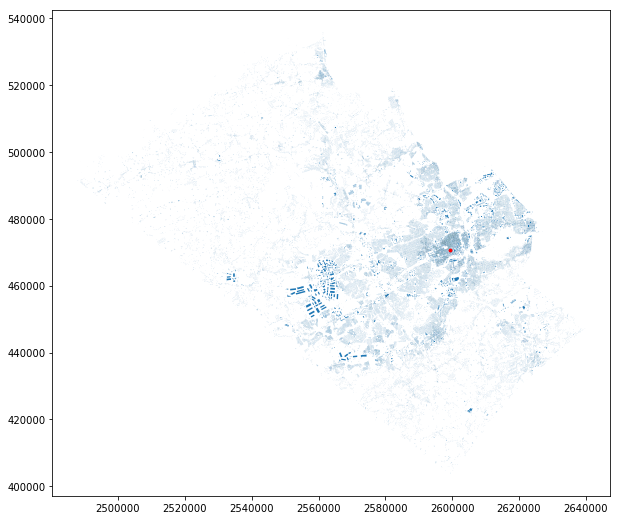

In [11]:
#Let's plot the two features together and see if there is big geographic deviation

ax = bldg.plot(figsize = (10, 10))
cg.plot(ax=ax, color = 'red', markersize = 8)
ax.set_axis_off

# Second step:

## I need to create a one mile buffer around the point I just created. 

In [11]:
cb = cg.buffer(5280) #The mapping unit is ft

#Convert it to a GeoDataFrame, convenient for further analysis
df2 = gpd.GeoDataFrame(crs = bldg1.crs, geometry = gpd.GeoSeries(cb))

In [24]:
bldg1.shape
df2.shape

(166474, 17)

(1, 1)

# Third step:

## Select all the building shapes that intersect the buffer zone from step 2

In [37]:
bldg_buffer = gpd.overlay(bldg1, df2, how = 'intersection')
bldg_buffer.shape

C:\Users\bliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\geopandas\base.py:29: UserWarning: GeoSeries crs mismatch: {'proj': 'lcc', 'lat_1': 39.93333333333333, 'lat_2': 40.96666666666667, 'lat_0': 39.33333333333334, 'lon_0': -77.75, 'x_0': 600000.0000000001, 'y_0': 0, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True} and None
  other.crs))


(16930, 17)

In [41]:
bldg_buffer.head()

,PIN,PARNUM,CARDNUM,BLDGNUM,STNUM,STPRE,STNAME,STTYPE,STSUF,UNITNUM,UNITS,BTYPE,Shape_area,Shape_len,DIST,randHeight,geometry
4,549765516071,1,01,None,1135,None,TREMONT,CIR,None,None,0.0,1,2563.257767,253.174285,25,45,"POLYGON ((2596609.362474114 475069.6406630129,..."
5,549764683481,1,01,None,1125,W,LIVINGSTON,ST,None,None,0.0,1,1669.833895,177.391634,25,70,"POLYGON ((2596610.71975486 474811.5529246032, ..."
6,549774185429,1,01,None,1006,N,10TH,ST,None,None,0.0,1,3421.091083,278.192872,25,73,"POLYGON ((2597151.974905938 474808.6772741824,..."
7,549775103387,1,01,None,1022,N,10TH,ST,None,None,0.0,1,2422.887662,204.941347,25,80,"POLYGON ((2597121.765320688 475024.8618811816,..."
8,549775114181,1,01,None,1030,N,10TH,ST,None,None,0.0,1,2078.716801,224.740792,25,147,"POLYGON ((2597129.301722944 475092.0146340132,..."


# Fourth step:

## Save our results to shapefile

In [39]:
bldg_buffer.to_file('C:\GIS Open Source\Python\RasterProcessing\Buffer_Buildings.shp')